# **Create model for digit recognition using CNN with high accurancy**


<h2> import libraries </h2>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np  # used for handling numbers
from keras import callbacks
from keras.utils import np_utils
from keras import backend as K

<h1> First step : import Dataset (load data ) </h1>

# 1) Import dataset 

<p> i used mnist as dataset for training my model </p>

In [2]:
mnist = tf.keras.datasets.mnist


(x_train,y_train),(x_test,y_test)=mnist.load_data() 


### showing some exemples from dataset(MNIST)

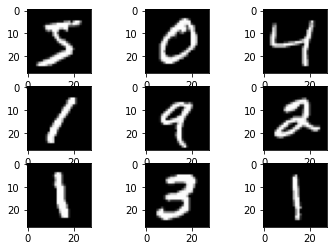

In [3]:

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# 2) Data Pre-processing

- To get high predictions , we must construct the data set and transform the data correctly. 

- The image data can not be fed directly into the model so we need to perform some operations and process the data to make it ready for our neural network.

#### a) Normalize data
<p>
Data normalization is used in machine learning to make model training less sensitive to the scale of features. </p>


##### Reference:
https://developers.google.com/machine-learning/data-prep

In [4]:
from sklearn import preprocessing


In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)


 #### printing first 10 images

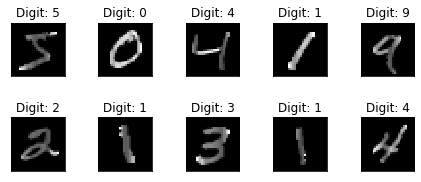

In [6]:

for i in range(10):

    plt.subplot(3,5,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

#### b) Encoding Data : to_categorical

- Converts a class vector (integers) to binary class matrix.
- to_categorical transform your training data before you pass it to your model. 
If your training data uses classes as numbers, to_categorical will transform those numbers 
in proper vectors for using with models. You cant simply train a classification model without that.. 


##### Reference:
https://www.geeksforgeeks.org/python-keras-keras-utils-to_categorical/

In [7]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

#### c) reshape data
<p>
- Gives a new shape to an array without changing its data.
    <br>
- By reshaping we can add or remove dimensions or change number of elements in each dimension. </p>


##### References:
- https://www.w3resource.com/numpy/manipulation/reshape.php
- https://flexiple.com/python/numpy-reshape/

In [8]:
IMG_SIZE=28
#We have to reshape the image into a single column.
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)

print("training simple dimension",x_trainr.shape) #60000 training 
print("testing simple dimension",x_testr.shape) #10000 test 

training simple dimension (60000, 28, 28, 1)
testing simple dimension (10000, 28, 28, 1)


# 3) Building model || Create the Neural Network   


#### a) import the used lib


In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow import keras
from tensorflow.keras.layers import Dense ,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [10]:
model = Sequential() #import model


<p> Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. </p>

#### b) create model


In [11]:

model = Sequential() #import model

#1st layer
model.add(Conv2D(32,(3,3),padding='same', strides=(1, 1),input_shape=x_trainr.shape[1:]))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))


#2nd layer
model.add(Conv2D(64,(3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))


#3nd layer
model.add(Conv2D(128,(3,3))) 
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))


#Fully connected
model.add(Flatten())

model.add(Dense(128))
model.add(Activation("relu"))
model.add(keras.layers.Dropout(0.2))


model.add(Dense(50))
model.add(Activation("relu"))
model.add(keras.layers.Dropout(0.2))


model.add(Dense(10)) 
model.add(Activation("softmax"))




In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 12, 12, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

#### c) define earlystopping

In [13]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="auto", patience = 5, 
                                        verbose=0,
                                        restore_best_weights = True)

##### Reference:

https://keras.io/api/callbacks/early_stopping/

#### c) compiling model

In [14]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])





# 4) Train Model

In [ ]:
history=model.fit(x_trainr,y_train,epochs=50,
                  validation_data=(x_test, y_test),
                  batch_size=200,
                  verbose=1,
                  callbacks =[earlystopping]) #training my model


Epoch 1/50
300/300 [==============================] - 23s 76ms/step - loss: 0.4890 - accuracy: 0.8407 - val_loss: 0.0973 - val_accuracy: 0.9693
Epoch 2/50
300/300 [==============================] - 21s 71ms/step - loss: 0.1165 - accuracy: 0.9663 - val_loss: 0.0492 - val_accuracy: 0.9839
Epoch 3/50
300/300 [==============================] - 21s 69ms/step - loss: 0.0737 - accuracy: 0.9784 - val_loss: 0.0431 - val_accuracy: 0.9852
Epoch 4/50
300/300 [==============================] - 20s 67ms/step - loss: 0.0578 - accuracy: 0.9835 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 5/50
300/300 [==============================] - 25s 82ms/step - loss: 0.0437 - accuracy: 0.9873 - val_loss: 0.0409 - val_accuracy: 0.9869
Epoch 6/50
300/300 [==============================] - 26s 86ms/step - loss: 0.0379 - accuracy: 0.9892 - val_loss: 0.0323 - val_accuracy: 0.9910
Epoch 7/50
300/300 [==============================] - 24s 81ms/step - loss: 0.0324 - accuracy: 0.9910 - val_loss: 0.0291 - val_accuracy:

# 5) Evaluating Model Performance

In [ ]:
test_loss,test_acc =model.evaluate(x_testr,y_test,verbose=1)
print('Accurancy:' ,test_acc*100,'%')
print('Loss: ',test_loss*100,'%')

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

# 6) Predicting on Test Data = Test


# 7) Save model


#### Ref: https://www.tutorialspoint.com/deep_learning_with_keras/index.htm